### 載入整理資料

In [1]:
from keras.datasets import imdb  #從 keras.datasets 套件中匯入 imdb 資料

from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

import numpy as np  #匯入 numpy 模組, 後續程式以 np 使用
import matplotlib.pyplot as plt  #匯入 matplotlib.pyplot 模組, 後續程式用 plt 使用

(train_data, train_labels),(test_data, test_labels)= imdb.load_data(
    num_words=10000)  #從 imdb 中讀取, 只有在訓練集當中最常用的前 10,000 個單字才會被載入, 分別存入 (訓練資料, 訓練標籤) 和 (測試資料, 測試標籤)

def vectorize_sequences(sequences, dimension=10000):  #sequences 將傳入 train_data
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):  #用 enumerate 取元素值
        results[i, sequence] = 1.   #將 result[i] 特定索引值的數值設定為 1
    return results
    
x_train = vectorize_sequences(train_data)  #向量化訓練資料
x_test = vectorize_sequences(test_data)  #向量化測試資料

y_train = np.asarray(train_labels).astype('float32')  #向量化訓練標籤
y_test = np.asarray(test_labels).astype('float32')  #向量化測試標籤

x_val = x_train[:10000]  #取輸入資料的前 10000 個做驗證 (val)
partial_x_train = x_train[10000:]  #輸入資料的第 10000 個開始才是訓練資料
y_val = y_train[:10000]  #對應的, 要取標籤的前 10000 個做為驗證標籤
partial_y_train = y_train[10000:]  #從標籤的第 10000 個開始才是訓練資料的標籤

Using TensorFlow backend.


### 顯示結果函式

In [2]:
def show_result(history, model):
    history_dict = history.history
    
    loss_values = history_dict['loss']  #取得每次訓練的 loss 訓練損失分數並存成 loss_values 變數
    val_loss_values = history_dict['val_loss']  #取得每次驗證的 val_loss 驗證損失分數並指定給 val_loss_values 變數
    
    epochs = range(1, len(loss_values)+ 1)  #len(loss_values) 項目個數為 20,範圍從 1 到 21 (不含 21) 的期間
    
    plt.plot(epochs, loss_values, 'bo', label='Training loss')  #以 'b' 指定用藍色線條畫出 x 軸為訓練週期、y 軸為驗證損失分數的圖表, 標籤設為驗證損失分數
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')  #以 'bo' 指定用藍色點點畫出 x 軸為訓練週期、y 軸為訓練損失分數的圖表, 標籤設為訓練損失分數
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')  #將此圖表標題的 x 軸設為訓練週期分數
    plt.ylabel('Loss')  #將此圖表標題的 y 軸設為損失
    plt.legend()  #可以追加每個輸出圖表的圖像名稱
    plt.show()  #顯示圖表

    plt.clf()  #清除圖表
    acc = history_dict['acc']
    val_acc = history_dict['val_acc']
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    results = model.evaluate(x_test, y_test)  #輸入測試資料與測試標籤進行評估
    print(results)

### 一個隱藏層

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 67us/step - loss: 0.4950 - acc: 0.7927 - val_loss: 0.3810 - val_acc: 0.8720
Epoch 2/20
15000/15000 [==============================] - 1s 42us/step - loss: 0.3112 - acc: 0.9047 - val_loss: 0.3172 - val_acc: 0.8834
Epoch 3/20
15000/15000 [==============================] - 1s 42us/step - loss: 0.2391 - acc: 0.9270 - val_loss: 0.2896 - val_acc: 0.8883
Epoch 4/20
15000/15000 [==============================] - 1s 42us/step - loss: 0.1979 - acc: 0.9400 - val_loss: 0.2772 - val_acc: 0.8894
Epoch 5/20
15000/15000 [==============================] - 1s 42us/step - loss: 0.1680 - acc: 0.9489 - val_loss: 0.2971 - val_acc: 0.8784
Epoch 6/20
15000/15000 [==============================] - 1s 42us/step - loss: 0.1443 - acc: 0.9570 - val_loss: 0.2816 - val_acc: 0.8855
Epoch 7/20
15000/15000 [==============================] - 1s 42us/step - loss: 0.1263 - acc: 0.9644 - val_loss: 0.2993 - val_acc

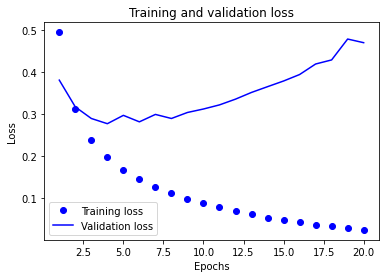

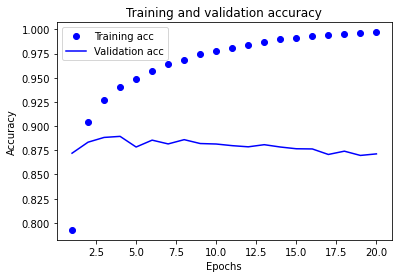

25000/25000 [==============================] - 3s 111us/step
[0.5058166416358948, 0.8579999804496765]


array([[0.05873088],
       [0.9999994 ],
       [0.97700137],
       ...,
       [0.02203991],
       [0.04444138],
       [0.88310647]], dtype=float32)

In [3]:
model = models.Sequential()  #使用 models 模組的 Sequential 類別, 建立一個物件讓新增的神經網路層可以進行堆疊
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))  #輸入層
model.add(layers.Dense(1, activation='sigmoid'))  #輸出層

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,  #自行指定其他的損失函數與 metrics 函數
              metrics=['acc'])

#呼叫 fit() 開始訓練 (使用 partial_x_train 輸入資料、 partial_y_train 標籤、20 個訓練週期、一次訓練週期使用 512 筆資料
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))  #同時傳入驗證集的資料與標籤

show_result(history, model)
model.predict(x_test)

### 三個隱藏

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 48us/step - loss: 0.5077 - acc: 0.7863 - val_loss: 0.4194 - val_acc: 0.8284
Epoch 2/20
15000/15000 [==============================] - 1s 43us/step - loss: 0.2954 - acc: 0.9045 - val_loss: 0.2952 - val_acc: 0.8904
Epoch 3/20
15000/15000 [==============================] - 1s 43us/step - loss: 0.2096 - acc: 0.9279 - val_loss: 0.3356 - val_acc: 0.8677
Epoch 4/20
15000/15000 [==============================] - 1s 43us/step - loss: 0.1625 - acc: 0.9454 - val_loss: 0.2835 - val_acc: 0.8867
Epoch 5/20
15000/15000 [==============================] - 1s 43us/step - loss: 0.1317 - acc: 0.9559 - val_loss: 0.3014 - val_acc: 0.8835
Epoch 6/20
15000/15000 [==============================] - 1s 43us/step - loss: 0.1031 - acc: 0.9679 - val_loss: 0.3949 - val_acc: 0.8643
Epoch 7/20
15000/15000 [==============================] - 1s 45us/step - loss: 0.0821 - acc: 0.9763 - val_loss: 0.3825 - val_acc

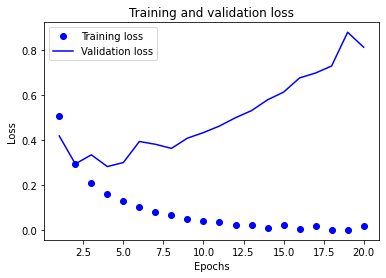

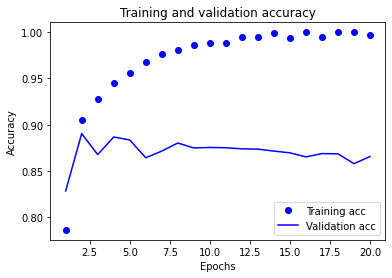

25000/25000 [==============================] - 2s 95us/step
[0.8924685661888122, 0.8499600291252136]


array([[8.9674495e-04],
       [9.9999964e-01],
       [4.3061608e-01],
       ...,
       [3.3480005e-04],
       [4.6772808e-03],
       [3.4718087e-01]], dtype=float32)

In [4]:
model = models.Sequential()  #使用 models 模組的 Sequential 類別, 建立一個物件讓新增的神經網路層可以進行堆疊
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))  #輸入層
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))  #輸出層

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,  #自行指定其他的損失函數與 metrics 函數
              metrics=['acc'])

#呼叫 fit() 開始訓練 (使用 partial_x_train 輸入資料、 partial_y_train 標籤、20 個訓練週期、一次訓練週期使用 512 筆資料
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))  #同時傳入驗證集的資料與標籤

show_result(history, model)
model.predict(x_test)

### 改變 unit 數量

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 49us/step - loss: 0.5107 - acc: 0.7665 - val_loss: 0.3424 - val_acc: 0.8841
Epoch 2/20
15000/15000 [==============================] - 1s 43us/step - loss: 0.2800 - acc: 0.9036 - val_loss: 0.2865 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 1s 44us/step - loss: 0.2007 - acc: 0.9277 - val_loss: 0.3528 - val_acc: 0.8579
Epoch 4/20
15000/15000 [==============================] - 1s 44us/step - loss: 0.1482 - acc: 0.9480 - val_loss: 0.3045 - val_acc: 0.8827
Epoch 5/20
15000/15000 [==============================] - 1s 48us/step - loss: 0.1138 - acc: 0.9611 - val_loss: 0.3518 - val_acc: 0.8721
Epoch 6/20
15000/15000 [==============================] - 1s 44us/step - loss: 0.0842 - acc: 0.9719 - val_loss: 0.3378 - val_acc: 0.8857
Epoch 7/20
15000/15000 [==============================] - 1s 44us/step - loss: 0.0551 - acc: 0.9841 - val_loss: 0.3809 - val_acc

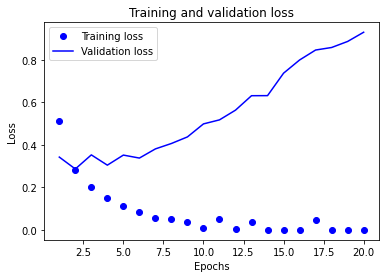

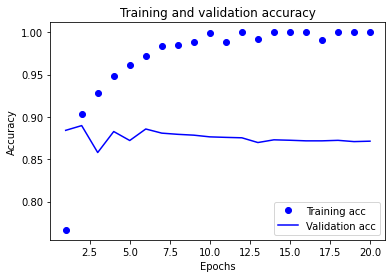

25000/25000 [==============================] - 2s 84us/step
[1.0528429133296013, 0.8553599715232849]


array([[4.6504767e-05],
       [1.0000000e+00],
       [9.9958473e-01],
       ...,
       [3.2536838e-05],
       [5.6784938e-04],
       [1.4848796e-01]], dtype=float32)

In [5]:
model = models.Sequential()  #使用 models 模組的 Sequential 類別, 建立一個物件讓新增的神經網路層可以進行堆疊
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))  #輸入層
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))  #輸出層

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,  #自行指定其他的損失函數與 metrics 函數
              metrics=['acc'])

#呼叫 fit() 開始訓練 (使用 partial_x_train 輸入資料、 partial_y_train 標籤、20 個訓練週期、一次訓練週期使用 512 筆資料
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))  #同時傳入驗證集的資料與標籤

show_result(history, model)
model.predict(x_test)

### mse loss function

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 49us/step - loss: 0.1648 - acc: 0.7775 - val_loss: 0.1099 - val_acc: 0.8758
Epoch 2/20
15000/15000 [==============================] - 1s 45us/step - loss: 0.0867 - acc: 0.9053 - val_loss: 0.0994 - val_acc: 0.8738
Epoch 3/20
15000/15000 [==============================] - 1s 43us/step - loss: 0.0614 - acc: 0.9332 - val_loss: 0.0854 - val_acc: 0.8881
Epoch 4/20
15000/15000 [==============================] - 1s 45us/step - loss: 0.0472 - acc: 0.9496 - val_loss: 0.0847 - val_acc: 0.8855
Epoch 5/20
15000/15000 [==============================] - 1s 45us/step - loss: 0.0376 - acc: 0.9610 - val_loss: 0.0972 - val_acc: 0.8687
Epoch 6/20
15000/15000 [==============================] - 1s 45us/step - loss: 0.0321 - acc: 0.9664 - val_loss: 0.0858 - val_acc: 0.8840
Epoch 7/20
15000/15000 [==============================] - 1s 45us/step - loss: 0.0247 - acc: 0.9775 - val_loss: 0.1059 - val_acc

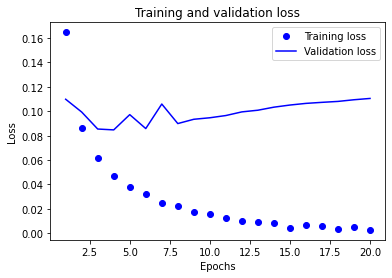

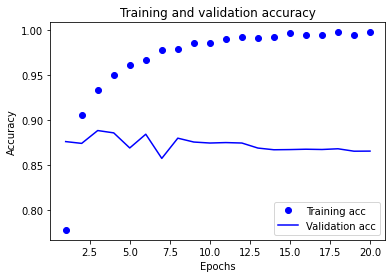

25000/25000 [==============================] - 2s 89us/step
[0.12248388030469418, 0.8518000245094299]


array([[0.03533936],
       [0.9999999 ],
       [0.6890367 ],
       ...,
       [0.02693492],
       [0.03796959],
       [0.97751606]], dtype=float32)

In [6]:
model = models.Sequential()  #使用 models 模組的 Sequential 類別, 建立一個物件讓新增的神經網路層可以進行堆疊
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))  #輸入層
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  #輸出層

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.mse,  #自行指定其他的損失函數與 metrics 函數
              metrics=['acc'])

#呼叫 fit() 開始訓練 (使用 partial_x_train 輸入資料、 partial_y_train 標籤、20 個訓練週期、一次訓練週期使用 512 筆資料
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))  #同時傳入驗證集的資料與標籤

show_result(history, model)
model.predict(x_test)

### tanh

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 47us/step - loss: 0.1673 - acc: 0.7977 - val_loss: 0.1258 - val_acc: 0.8475
Epoch 2/20
15000/15000 [==============================] - 1s 44us/step - loss: 0.0864 - acc: 0.9084 - val_loss: 0.0959 - val_acc: 0.8769
Epoch 3/20
15000/15000 [==============================] - 1s 43us/step - loss: 0.0599 - acc: 0.9321 - val_loss: 0.0818 - val_acc: 0.8916
Epoch 4/20
15000/15000 [==============================] - 1s 43us/step - loss: 0.0443 - acc: 0.9503 - val_loss: 0.0824 - val_acc: 0.8853
Epoch 5/20
15000/15000 [==============================] - 1s 44us/step - loss: 0.0347 - acc: 0.9623 - val_loss: 0.0934 - val_acc: 0.8734
Epoch 6/20
15000/15000 [==============================] - 1s 43us/step - loss: 0.0277 - acc: 0.9696 - val_loss: 0.0884 - val_acc: 0.8810
Epoch 7/20
15000/15000 [==============================] - 1s 43us/step - loss: 0.0215 - acc: 0.9781 - val_loss: 0.0895 - val_acc

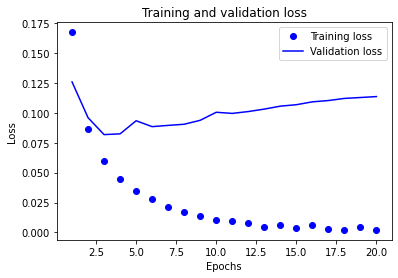

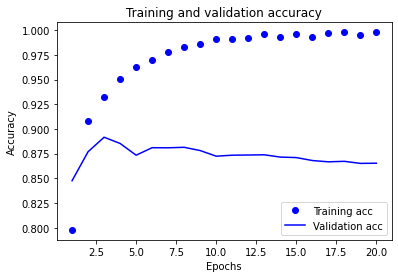

25000/25000 [==============================] - 2s 88us/step
[0.1268330080616474, 0.8519999980926514]


array([[0.00266637],
       [0.9999758 ],
       [0.9594957 ],
       ...,
       [0.0081695 ],
       [0.05122404],
       [0.86359286]], dtype=float32)

In [7]:
model = models.Sequential()  #使用 models 模組的 Sequential 類別, 建立一個物件讓新增的神經網路層可以進行堆疊
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))  #輸入層
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))  #輸出層

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.mse,  #自行指定其他的損失函數與 metrics 函數
              metrics=['acc'])

#呼叫 fit() 開始訓練 (使用 partial_x_train 輸入資料、 partial_y_train 標籤、20 個訓練週期、一次訓練週期使用 512 筆資料
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))  #同時傳入驗證集的資料與標籤

show_result(history, model)
model.predict(x_test)